In [1]:
import pandas
import numpy
import random
import sys

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, GRU
from keras.optimizers import RMSprop, Adam, SGD

import matplotlib.pyplot as plt

%matplotlib inline

/Users/mmccurdy/.virtualenvs/starwars-namer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cd ..

/Users/mmccurdy/code/starwars-namer


In [60]:
from swnamer.process import *

In [5]:
names = pandas.read_csv('output/names.csv')
sw_names = pandas.read_csv('output/starwars_processed.csv')

In [6]:
combined = pandas.concat([names, sw_names])

In [10]:
timesteps = 3

In [9]:
token_to_index, index_to_token = create_indices(combined, 'name')

In [11]:
with open('output/names.csv') as infile:
    infile.readline()
    names_text = infile.read()

In [15]:
names_text = names_text.lower()

In [17]:
chunks, next_char = chunk_names_file(names_text, timesteps)

In [18]:
vocab_size = len(token_to_index)
vocab_size

72

In [19]:
X, y = create_training_vectors(chunks, next_char, token_to_index, timesteps, vocab_size)

In [20]:
X.shape

(55852, 3, 72)

In [21]:
y.shape

(55852, 72)

In [40]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, vocab_size), return_sequences=True))
model.add(LSTM(64, input_shape=(timesteps, vocab_size)))
model.add(Dense(vocab_size))
model.add(Activation('softmax'))
optimizer = Adam(lr=.01, clipvalue=5)
model.compile(optimizer, 'categorical_crossentropy')

In [41]:
es = EarlyStopping(mode='min', patience=7, min_delta=.001)
sampler = SampleNamesFile(timesteps, vocab_size, token_to_index, index_to_token, names_text)
checkpoint = ModelCheckpoint('output/names-base-model.hdf5', save_best_only=True)
callbacks = [sampler, es, checkpoint]

In [42]:
history = model.fit(X, y, validation_split=.2, epochs=200, batch_size=32, callbacks=callbacks)

Train on 44681 samples, validate on 11171 samples
Epoch 1/200
44681/44681 [==============================] - 10s 220us/step - loss: 2.3923 - val_loss: 2.2307

----- Generating text after Epoch: 0
----- Generating with seed: "y"
----- diversity: 0.2
ya
----- diversity: 0.5
ya
----- diversity: 1.0
ytlitherges
----- diversity: 1.2
yoprirozeidh
Epoch 2/200
44681/44681 [==============================] - 9s 192us/step - loss: 2.1591 - val_loss: 2.1502
Epoch 3/200
44681/44681 [==============================] - 9s 206us/step - loss: 2.0761 - val_loss: 2.1061
Epoch 4/200
44681/44681 [==============================] - 12s 267us/step - loss: 2.0210 - val_loss: 2.0770
Epoch 5/200
44681/44681 [==============================] - 13s 290us/step - loss: 1.9827 - val_loss: 2.0737
Epoch 6/200
44681/44681 [==============================] - 12s 268us/step - loss: 1.9540 - val_loss: 2.0739

----- Generating text after Epoch: 5
----- Generating with seed: "h"
----- diversity: 0.2
h
----- diversity: 0.5
hner


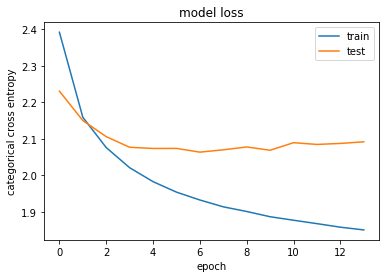

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('categorical cross entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
gen = NameGenerator(timesteps, vocab_size, token_to_index, index_to_token, model)

In [59]:
gen.generate(10, seed='')

['lmronne', 'oee', 'kt', '', 'darine', 'r', 'm', 'md', 'hnte', 'aaimilthelina']

In [63]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, vocab_size), return_sequences=True))
model.add(Dropout(.5))
model.add(LSTM(64, input_shape=(timesteps, vocab_size)))
model.add(Dropout(.5))
model.add(Dense(vocab_size))
model.add(Activation('softmax'))
optimizer = Adam(lr=.01, clipvalue=5)
model.compile(optimizer, 'categorical_crossentropy')

es = EarlyStopping(mode='min', patience=7, min_delta=.001)
sampler = SampleNamesFile(timesteps, vocab_size, token_to_index, index_to_token, names_text)
checkpoint = ModelCheckpoint('output/names-base-model.hdf5', save_best_only=True)
callbacks = [sampler, es, checkpoint]

history = model.fit(X, y, validation_split=.2, epochs=200, batch_size=32, callbacks=callbacks)

Train on 44681 samples, validate on 11171 samples
Epoch 1/200
44681/44681 [==============================] - 11s 254us/step - loss: 2.5389 - val_loss: 2.3216

----- Generating text after Epoch: 0
----- Generating with seed: "u"
----- diversity: 0.2
u
----- diversity: 0.5
uad
----- diversity: 1.0
uine
----- diversity: 1.2
ues
Epoch 2/200
44681/44681 [==============================] - 10s 213us/step - loss: 2.3620 - val_loss: 2.2614
Epoch 3/200
44681/44681 [==============================] - 10s 230us/step - loss: 2.3191 - val_loss: 2.2274
Epoch 4/200
44681/44681 [==============================] - 10s 220us/step - loss: 2.2935 - val_loss: 2.2074
Epoch 5/200
44681/44681 [==============================] - 10s 228us/step - loss: 2.2785 - val_loss: 2.1926
Epoch 6/200
44681/44681 [==============================] - 10s 221us/step - loss: 2.2613 - val_loss: 2.1839

----- Generating text after Epoch: 5
----- Generating with seed: "q"
----- diversity: 0.2
qnnne
----- diversity: 0.5
qnndre
----- di

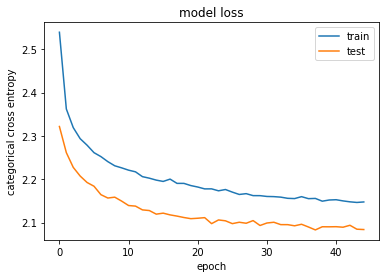

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('categorical cross entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
gen = NameGenerator(timesteps, vocab_size, token_to_index, index_to_token, model)

In [75]:
gen.generate(10, seed='dus', diversity=1.5)

['dusta',
 'dus',
 'dus',
 'dusetinasthakelsetu',
 'dussemaivy',
 'dus',
 'dus',
 'dusuchersprykmeicaky',
 'dustoinethyla',
 'dus']

In [74]:
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, vocab_size)))
model.add(Dense(vocab_size))
model.add(Activation('softmax'))
optimizer = Adam(lr=.01, clipvalue=5)
model.compile(optimizer, 'categorical_crossentropy')

es = EarlyStopping(mode='min', patience=7, min_delta=.001)
sampler = SampleNamesFile(timesteps, vocab_size, token_to_index, index_to_token, names_text)
checkpoint = ModelCheckpoint('output/names-base-model.hdf5', save_best_only=True)
callbacks = [sampler, es, checkpoint]

history = model.fit(X, y, validation_split=.2, epochs=200, batch_size=32, callbacks=callbacks)

Train on 44681 samples, validate on 11171 samples
Epoch 1/200
44681/44681 [==============================] - 9s 197us/step - loss: 2.3279 - val_loss: 2.2052

----- Generating text after Epoch: 0
----- Generating with seed: "u"
----- diversity: 0.2
uiine
----- diversity: 0.5
uih
----- diversity: 1.0
uianni
----- diversity: 1.2
urie
Epoch 2/200
44681/44681 [==============================] - 7s 148us/step - loss: 2.1199 - val_loss: 2.1132
Epoch 3/200
44681/44681 [==============================] - 6s 136us/step - loss: 2.0342 - val_loss: 2.0758
Epoch 4/200
44681/44681 [==============================] - 6s 140us/step - loss: 1.9835 - val_loss: 2.0682
Epoch 5/200
44681/44681 [==============================] - 6s 142us/step - loss: 1.9446 - val_loss: 2.0638
Epoch 6/200
44681/44681 [==============================] - 7s 155us/step - loss: 1.9182 - val_loss: 2.0460

----- Generating text after Epoch: 5
----- Generating with seed: "i"
----- diversity: 0.2
ia
----- diversity: 0.5
iaannie
----- div

In [76]:
gen = NameGenerator(timesteps, vocab_size, token_to_index, index_to_token, model)

In [80]:
gen.generate(10, seed='', diversity=1)

['reilindie',
 'c',
 'iaeo',
 'rla',
 'ye',
 '',
 'vlon',
 'i',
 'ie',
 'tyhahardlairda']